Import libraries

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import os 
import numpy as np

# 1. RNN with a single Neuron

### Q1: Describe each function in this code 

In [21]:
class SingleRNN(nn.Module) : 
  def __init__(self, n_inputs, n_neurons) :
    super(SingleRNN, self).__init__()

    ## défine a random tensor 
    self.Wx = torch.randn(n_inputs, n_neurons) # 4 X 1 
    self.Wy = torch.randn(n_neurons, n_neurons) # 1 X 1

    self.b = torch.zeros(1, n_neurons) # 1 X 4

  def forward(self, X0, X1) : 
    self.Y0 = torch.tanh(torch.mm(X0, self.Wx) + self.b)

    self.Y1 = torch.tanh(torch.mm(self.Y0, self.Wy) + torch.mm(X1, self.Wx) + self.b)

    return self.Y0, self.Y1

In this code, the fonction init defines all the paramaters we need. There is one layer and one neuron RNN. Two weight matrices are defined : Wx and Wy. The bias b is added too. The forward function returns two outputs Y0 and Y1. The activation function used in these function is the tanh fonction.

In [22]:
N_INPUT = 4
N_NEURONS = 1

X0_batch = torch.tensor([[0,1,2,0],[3,4,5,0],
                        [6,7,8,0],[9,0,1,0]], 
                        dtype = torch.float) #t = 0 => 4 X 4

X1_batch = torch.tensor([[9,8,7,0],[0,0,0,0],
                        [6,5,4,0],[3,2,1,0]], 
                        dtype = torch.float) #t = 0 => 4 X 4

model = SingleRNN(N_INPUT, N_NEURONS)

Y0_val, Y1_val = model(X0_batch, X1_batch)

Q2: After we have fed the input into the computation graph, print the outputs for each timestep (Y0, Y1).

In [23]:
print("Y0_val", Y0_val)
print("Y1_val", Y1_val)

Y0_val tensor([[0.3701],
        [0.9997],
        [1.0000],
        [1.0000]])
Y1_val tensor([[1.0000],
        [0.2533],
        [1.0000],
        [0.9992]])


# 2.Increasing Neurons in RNN Layer

Q3: Write the code for this model “BasicRNN”

In [24]:
class BasicRNN(nn.Module):
    def __init__(self, n_inputs, n_neurons):
        super(BasicRNN, self).__init__()
        
        self.Wx = torch.randn(n_inputs, n_neurons) # n_inputs X n_neurons
        self.Wy = torch.randn(n_neurons, n_neurons) # n_neurons X n_neurons
        
        self.b = torch.zeros(1, n_neurons) # 1 X n_neurons
    
    def forward(self, X0, X1):
        self.Y0 = torch.tanh(torch.mm(X0, self.Wx) + self.b) # batch_size X n_neurons
        
        self.Y1 = torch.tanh(torch.mm(self.Y0, self.Wy) +
                            torch.mm(X1, self.Wx) + self.b) # batch_size X n_neurons
        
        return self.Y0, self.Y1

Q4: Test the model

In [25]:
N_INPUT = 3 # number of features in input
N_NEURONS = 5 # number of units in layer

X0_batch = torch.tensor([[0,1,2], [3,4,5], 
                         [6,7,8], [9,0,1]],
                        dtype = torch.float) #t=0 => 4 X 3

X1_batch = torch.tensor([[9,8,7], [0,0,0], 
                         [6,5,4], [3,2,1]],
                        dtype = torch.float) #t=1 => 4 X 3

model = BasicRNN(N_INPUT, N_NEURONS)

Y0_val, Y1_val = model(X0_batch, X1_batch)

Q5: Print the outputs produced for each time step


In [26]:
print("Y0_val", Y0_val)
print("Y1_val", Y1_val)

Y0_val tensor([[-0.9952, -0.9865, -0.8539,  0.9830,  0.9269],
        [-1.0000, -1.0000, -1.0000,  1.0000,  1.0000],
        [-1.0000, -1.0000, -1.0000,  1.0000,  1.0000],
        [-1.0000, -1.0000,  0.9039, -0.2160,  1.0000]])
Y1_val tensor([[-1.0000, -1.0000, -1.0000,  1.0000,  1.0000],
        [-0.1830, -0.5755, -0.9096, -0.8761, -0.9983],
        [-1.0000, -1.0000, -1.0000,  1.0000,  0.9860],
        [-1.0000, -1.0000, -0.9979,  0.9997,  0.8725]])


Q6: What is the size of the outputs?

The outputs produced are of size (4 X 5)

# 3.PyTorch Built-in RNN Cell

In [27]:
rnn = nn.RNNCell(3,5) # n_input X n_neuros

X_batch = torch.tensor([[[0,1,2],[3,4,5],
                        [6,7,8],[9,0,1]],
                        [[9,8,7], [0,0,0],
                         [6,5,4], [3,2,1]]
                        ],
                        dtype = torch.float) #X0 and X1

hx = torch.randn(4,5) # m X_neurons
output = []

# for each time step
for i in range(2):
  hx = rnn(X_batch[i], hx)
  output.append(hx)

print(output)

[tensor([[ 0.1095,  0.7103, -0.5173, -0.1999,  0.4506],
        [ 0.9969,  0.9237,  0.9075, -0.9956, -0.3818],
        [ 1.0000,  0.9786,  0.9889, -1.0000, -0.7038],
        [ 0.9992,  0.9939,  0.7097, -0.9792,  0.9255]],
       grad_fn=<TanhBackward0>), tensor([[ 1.0000,  0.9990,  0.9323, -1.0000,  0.4386],
        [-0.7859,  0.5233, -0.3962,  0.2726,  0.7013],
        [ 0.9946,  0.9922,  0.6686, -0.9998,  0.8302],
        [ 0.7678,  0.9665, -0.3738, -0.8878,  0.6275]],
       grad_fn=<TanhBackward0>)]


In [28]:
class CleanBasicRNN(nn.Module):
  def __init__(self, batch_size, n_inputs, n_neurons):
    super(CleanBasicRNN, self).__init__()

    rnn = nn.RNNCell(n_inputs, n_neurons)
    self.hx = torch.randn(batch_size, n_neurons) # hidden state

  def forward(self, X):
    output = []

    # for each time step
    for i in range(2):
      self.hx = rnn(X[i], self.hx)
      output.append(self.hx)

    return output, self.hx

In [29]:
FIXED_BATCH_SIZE = 4
N_INPUT = 3
N_NEURONS = 5

X_batch = torch.tensor([[[0,1,2],[3,4,5],
                        [6,7,8],[9,0,1]],
                        [[9,8,7], [0,0,0],
                         [6,5,4], [3,2,1]]
                        ],
                        dtype = torch.float) #X0 and X1

model = CleanBasicRNN(FIXED_BATCH_SIZE, N_INPUT, N_NEURONS)
output_val, states_val = model(X_batch)
print(output_val) # contains all output for all timesteps
print(states_val) # contain values for final state or final timestep

[tensor([[ 0.4861,  0.0214, -0.0380, -0.1466, -0.0497],
        [ 0.9808,  0.9852,  0.9571, -0.9982, -0.5985],
        [ 0.9999,  0.9972,  0.9752, -1.0000, -0.4244],
        [ 0.9994,  0.9724, -0.1396, -0.9744,  0.9838]],
       grad_fn=<TanhBackward0>), tensor([[ 1.0000,  0.9983,  0.9150, -1.0000,  0.4692],
        [-0.8195,  0.4945, -0.3648,  0.2435,  0.7550],
        [ 0.9952,  0.9934,  0.6405, -0.9998,  0.7972],
        [ 0.8642,  0.9558, -0.2289, -0.8497,  0.4485]],
       grad_fn=<TanhBackward0>)]
tensor([[ 1.0000,  0.9983,  0.9150, -1.0000,  0.4692],
        [-0.8195,  0.4945, -0.3648,  0.2435,  0.7550],
        [ 0.9952,  0.9934,  0.6405, -0.9998,  0.7972],
        [ 0.8642,  0.9558, -0.2289, -0.8497,  0.4485]],
       grad_fn=<TanhBackward0>)


Q7: What is the difference between CleanBasicRNN and the previous code snippet?

We are adding a for loop and on the other hand we are touching the weights.

# 4.RNN for Image Classification

In [30]:
import torchvision
import torchvision.transforms as transforms

In [31]:
BATCH_SIZE = 64

# list all transformations
transform = transforms.Compose(
    [transforms.ToTensor()])

# download and load training dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

# download and load testing dataset
testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE,
                                         shuffle=False, num_workers=2)

9913344it [00:00, 26691834.19it/s]                             


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


29696it [00:00, 5077828.35it/s]          
  0%|          | 0/1648877 [00:00<?, ?it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



1649664it [00:00, 17643079.42it/s]         
5120it [00:00, 7061768.00it/s]          


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Q8: The code above loads and prepares the dataset to be fed into the computation graph we will build later on. Take a few minutes to play around with the code and understand what is happening.


The code download and load the MNIST and DataLoader datasets with the current Batch_Size and we do a shuffle for the dataloader.

Q9: Why we provided a batch size?

Usually, batch sizes are a power of 2, to take advantage of parallel computing in the GPUs.

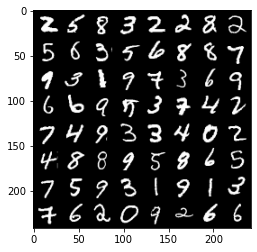

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    #img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

In [33]:
# parameters 
N_STEPS = 28
N_INPUTS = 28
N_NEURONS = 150
N_OUTPUTS = 10
N_EPHOCS = 10

In [34]:
class ImageRNN(nn.Module):
    def __init__(self, batch_size, n_steps, n_inputs, n_neurons, n_outputs):
        super(ImageRNN, self).__init__()
        
        self.n_neurons = n_neurons
        self.batch_size = batch_size
        self.n_steps = n_steps
        self.n_inputs = n_inputs
        self.n_outputs = n_outputs
        
        self.basic_rnn = nn.RNN(self.n_inputs, self.n_neurons) 
        
        self.FC = nn.Linear(self.n_neurons, self.n_outputs)
        
    def init_hidden(self,):
        # (num_layers, batch_size, n_neurons)
        return (torch.zeros(1, self.batch_size, self.n_neurons))
        
    def forward(self, X):
        # transforms X to dimensions: n_steps X batch_size X n_inputs
        X = X.permute(1, 0, 2) 
        
        self.batch_size = X.size(1)
        self.hidden = self.init_hidden()
        
        # lstm_out => n_steps, batch_size, n_neurons (hidden states for each time step)
        # self.hidden => 1, batch_size, n_neurons (final state from each lstm_out)
        lstm_out, self.hidden = self.basic_rnn(X, self.hidden)      
        out = self.FC(self.hidden)
        
        return out.view(-1, self.n_outputs) # batch_size X n_output

Q10: Describe what the ImageRNN model is doing, including the function __init__(...) , The init_hidden function and the output.

The initialization function __init__(...) declares variables in order to build the model. Then a basic RNN layer basic_rnn followed by a fully-connected layer self.FC are declared.
The init_hidden function initializes hidden weights with zero values. The forward function accepts an input of size n_steps X batch_size X n_neurons. Then the data go the RNN layer and then through the fully-connected layer.
The output are the log probabilities of the model.

In [35]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
model = ImageRNN(BATCH_SIZE, N_STEPS, N_INPUTS, N_NEURONS, N_OUTPUTS)
logits = model(images.view(-1, 28,28))
print(logits[0:10])

tensor([[-0.0053, -0.1162,  0.0076,  0.0220, -0.1156, -0.0303,  0.0997,  0.0810,
          0.0350,  0.0273],
        [-0.0243, -0.1171,  0.0123,  0.0302, -0.1289, -0.0167,  0.1031,  0.0637,
          0.0301,  0.0323],
        [ 0.0042, -0.1414, -0.0083, -0.0420, -0.0414, -0.0357,  0.1001,  0.0647,
         -0.0109,  0.0278],
        [-0.0372, -0.0975,  0.0163,  0.0454, -0.1169, -0.0049,  0.1082,  0.0733,
          0.0259,  0.0242],
        [ 0.0141, -0.1090,  0.0077, -0.0003, -0.1299,  0.0055,  0.0759,  0.0045,
          0.0363,  0.0303],
        [-0.0241, -0.1224,  0.0132,  0.0343, -0.1457, -0.0183,  0.1075,  0.0561,
          0.0351,  0.0357],
        [-0.0415, -0.1011,  0.0123,  0.0413, -0.1247, -0.0172,  0.1168,  0.0704,
          0.0427,  0.0251],
        [-0.0251, -0.1247,  0.0211,  0.0476, -0.1187, -0.0489,  0.1139,  0.0584,
          0.0445,  0.0089],
        [-0.0225, -0.1225,  0.0055,  0.0321, -0.1346, -0.0286,  0.1053,  0.0549,
          0.0399,  0.0290],
        [-0.0089, -

### Training

In [36]:
import torch.optim as optim

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Model instance
model = ImageRNN(BATCH_SIZE, N_STEPS, N_INPUTS, N_NEURONS, N_OUTPUTS)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

def get_accuracy(logit, target, batch_size):
    ''' Obtain accuracy for training round '''
    corrects = (torch.max(logit, 1)[1].view(target.size()).data == target.data).sum()
    accuracy = 100.0 * corrects/batch_size
    return accuracy.item()

In [37]:
for epoch in range(N_EPHOCS):  # loop over the dataset multiple times
    train_running_loss = 0.0
    train_acc = 0.0
    model.train()
    
    # TRAINING ROUND
    for i, data in enumerate(trainloader):
         # zero the parameter gradients
        optimizer.zero_grad()
        
        # reset hidden states
        model.hidden = model.init_hidden() 
        
        # get the inputs
        inputs, labels = data
        inputs = inputs.view(-1, 28,28) 

        # forward + backward + optimize
        outputs = model(inputs)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_running_loss += loss.detach().item()
        train_acc += get_accuracy(outputs, labels, BATCH_SIZE)
         
    model.eval()
    print('Epoch:  %d | Loss: %.4f | Train Accuracy: %.2f' 
          %(epoch, train_running_loss / i, train_acc/i))

Epoch:  0 | Loss: 0.8280 | Train Accuracy: 73.44
Epoch:  1 | Loss: 0.4231 | Train Accuracy: 87.75
Epoch:  2 | Loss: 0.3145 | Train Accuracy: 91.11
Epoch:  3 | Loss: 0.2404 | Train Accuracy: 93.33
Epoch:  4 | Loss: 0.2152 | Train Accuracy: 93.96
Epoch:  5 | Loss: 0.1681 | Train Accuracy: 95.40
Epoch:  6 | Loss: 0.1544 | Train Accuracy: 95.66
Epoch:  7 | Loss: 0.1433 | Train Accuracy: 96.00
Epoch:  8 | Loss: 0.1337 | Train Accuracy: 96.32
Epoch:  9 | Loss: 0.1469 | Train Accuracy: 95.86


Q11: Write the code to compute accuracy on testing MNIST dataset.

In [38]:
test_acc = 0.0
for i, data in enumerate(testloader, 0):
    inputs, labels = data
    inputs = inputs.view(-1, 28, 28)

    outputs = model(inputs)

    test_acc += get_accuracy(outputs, labels, BATCH_SIZE)
        
print('Test Accuracy: %.2f'%( test_acc/i))

Test Accuracy: 96.33


Asy you can see our model on the MNIST dataset performs great accuracy !